In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [4]:
# Idea general de los datos:

df = pd.read_csv("FuelConsumptionCo2.csv")

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [3]:
# Conocer las variables principales con el CO2.

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


### Gráfica de las características principales:

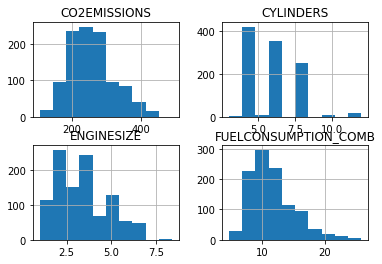

In [5]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

### Graficamos cada una de las variables respecto a las emisiones de CO2, para analizar comportamiento (linealidad).

#### Consumos de combustible:

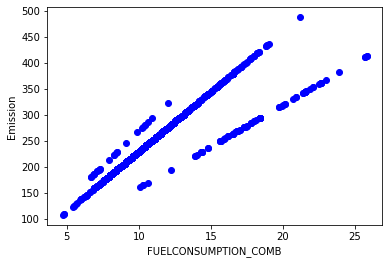

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

#### Engine size

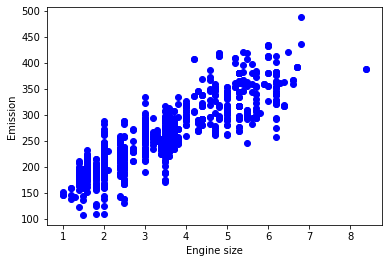

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Cylinders

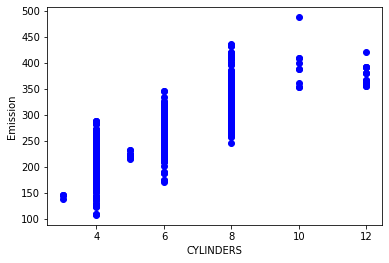

In [8]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

#### Creando el set de datos de entrenamiento y de el prueba

Train/Test Split divide el dataseet en uno de entrenamiento y otro de pruebas, siendo excluyentes.

Esto brinda una evaluación más exacta porque el set de entrenamiento no es parte de un set de datos que se usaron para entrenar datos. Refleja un escenario más real basado en problemas más actuales.

Esto significa que sabemos la salida de cada punto de datos del set. Y como estos datos no se usaron para entrenar el modelo, el modelo no sabe la salida de estos puntos de datos. Asi que es una real prueba fuera de muestra.

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Modelo de Regresión Lineal

### Entrenamiento de los datos (dist.) 

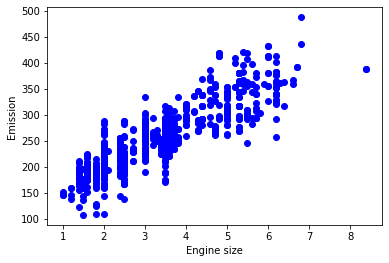

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Modelamiento

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.89020034]]
Intercept:  [125.78620721]


## Salidas con modelo

Graficamos la recta de ajuste sobre los datos:

Text(0, 0.5, 'Emission')

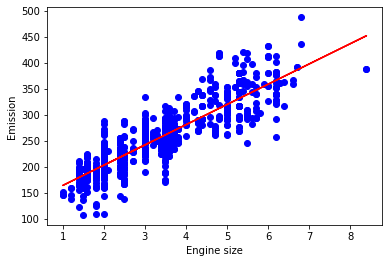

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluación 

Se comparan los valores actuales y predichos para calcular la exactitud del modelo. Analizar con métricas, indicador de error asociado al modelo.

Métrica seleccionada: MSE.

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2: %.2f" % r2_score(test_y_ , test_y) )

Error medio absoluto: 22.81
Suma residual de los cuadrados (MSE): 977.88
R2: 0.70


#### R2 obtenido es muy pobre, se deben probar otros modelos.